# [CoE202] note 05a. Polynomial regression with validation

- Class Date : 21.04.01..
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load data file from Google drive
#v from google.colab import drive
import scipy.io

# drive.mount("/content/drive")
# mat = scipy.io.loadmat('/content/drive/My Drive/01_LectureNotes/CoE202/Colab/data/data_polyfit_validation3.mat')
mat = scipy.io.loadmat('./data_polyfit_validation3.mat')

x = mat['x']
y = mat['y']

x = x[0:200]
y = y[0:200]

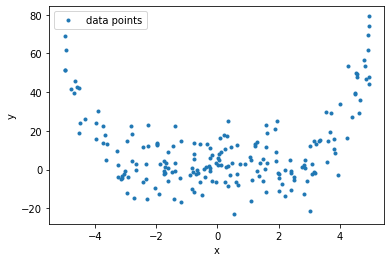

In [4]:
# plot data points
plt.plot(x, y, '.', label = 'data points')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

Let's shuffle the data before we split.

In [5]:
# shuffle dataset
new_idx = np.random.permutation(200)
x_shuffle = x[new_idx]
y_shuffle = y[new_idx]

And let's split the data set.

In [6]:
## split dataset 
#x_train = x_shuffle[0:500] # training data set
#x_val = x_shuffle[500:750] # validation data set
#x_test = x_shuffle[750:1000] # test data set

#y_train = y_shuffle[0:500] # training data set
#y_val = y_shuffle[500:750]  # validation data set
#y_test = y_shuffle[750:1000] # test data set

# split dataset 
x_train = x_shuffle[0:100] # training data set
x_val = x_shuffle[100:150] # validation data set
x_test = x_shuffle[150:200] # test data set

y_train = y_shuffle[0:100] # training data set
y_val = y_shuffle[100:150]  # validation data set
y_test = y_shuffle[150:200] # test data set

From note on polynomial regression, we studied two functions; poly_features, np_polynomial_regression. We will use these functions for validation.

In [7]:
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    # Compute the feature matrix in stages
    Phi = np.vander(X, K+1, increasing=True)  

    return Phi
  
def np_polynomial_regression(Phi, y):    
    # Phi: N x (K+1) matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: coefficients  (D x 1)
    
    N, D = Phi.shape
    Phi_t = Phi.T
    theta_ml = Phi_t @ Phi
    theta_ml = np.linalg.inv(theta_ml) 
    theta_ml = theta_ml @ Phi_t
    theta_ml = theta_ml @ y

    return theta_ml

With different K values in polynomial regression, let's observe how curve fits the data.

In [8]:
# polynomial fitting
K = 3  # Test for K = 1, 2, 3

Phi_train = poly_features(x_train, K) # N x (K+1) feature matrix
theta = np_polynomial_regression(Phi_train, y_train) 

p = np.poly1d(np.flip(theta[:,0]))
print(p)

        3         2
0.1165 x + 1.484 x - 1.242 x - 2.043


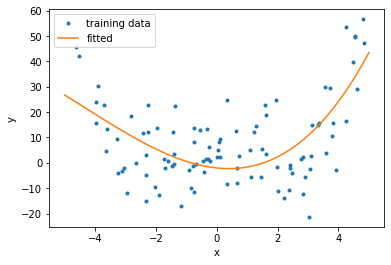

In [9]:
# plot results
xp = np.linspace(-5, 5, 100) 
plt.plot(x_train, y_train, '.', label = 'training data')
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

Let us now look at a more systematic way to assess the quality of the polynomial that we are trying to fit. For this, we compute the root-mean-squared-error (RMSE) between the $y$-values predicted by our polynomial and the ground-truth $y$-values. The RMSE is then defined as
$$
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N(y_n - y_n^\text{pred})^2}
$$
Write a function that computes the RMSE.

In [10]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2))         
    
    return rmse

In [11]:
# polynomial fitting
ypred_train = Phi_train @ theta

Phi_val = poly_features(x_val, K) 
ypred_val = Phi_val @ theta

rmse_train = RMSE(y_train, ypred_train)
rmse_val = RMSE(y_val, ypred_val)


Let's check the traininig loss and the validation loss.

In [12]:
print(rmse_train)
print(rmse_val)

12.463010779001685
11.839943656208323


And let's do a visual check.

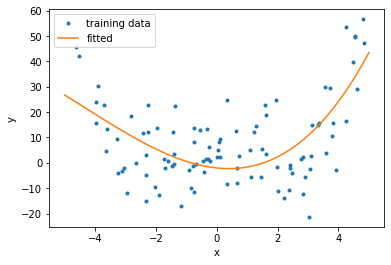

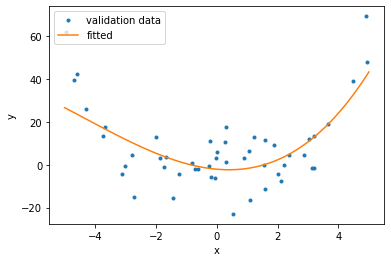

In [13]:
# plot results
xp = np.linspace(-5, 5, 100) 
plt.figure()
plt.plot(x_train, y_train, '.', label = 'training data')
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

# plot results
xp = np.linspace(-5, 5, 100) 
plt.figure()
plt.plot(x_val, y_val, '.', label = 'validation data')
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

Finally, let's check the performance on the test data set.

In [14]:
Phi_test = poly_features(x_test, K) 
ypred_test = Phi_test @ theta

rmse_test = RMSE(y_test, ypred_test)
print(rmse_test)

14.367543019753453
